In [44]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sc
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


import os

In [2]:
def elapsedtime_to_sec(el):
    tab = el.split(":")
    return float(tab[0])*60+float(tab[1])
#because x264 output is "m:s", where m is the number of minutes and s the number of seconds 

res_dir = "../res_ugc/"

v_names = sorted(os.listdir(res_dir)) # so we keep the same ids between two launches

listVideo = []

for v in v_names:
    data = pd.read_table(res_dir+v, delimiter = ',')
    data['etime'] = [*map(elapsedtime_to_sec, data['elapsedtime'])]
    listVideo.append(data)

In [3]:
#our variable of interest
predDimension = "size"

# RQ1 - Input sensitivity

## RQ1.1 - Do the same options have the same effect on all inputs?

In [4]:
nbVideos = len(listVideo)
corrSpearman= [[0 for x in range(nbVideos)] for y in range(nbVideos)]

for i in range(nbVideos):
    for j in range(nbVideos):
        if (i == j):
            corrSpearman[i][j] = 1
        else:
            corrSpearman[i][j] = sc.spearmanr(listVideo[i][predDimension],
                                            listVideo[j][predDimension]).correlation

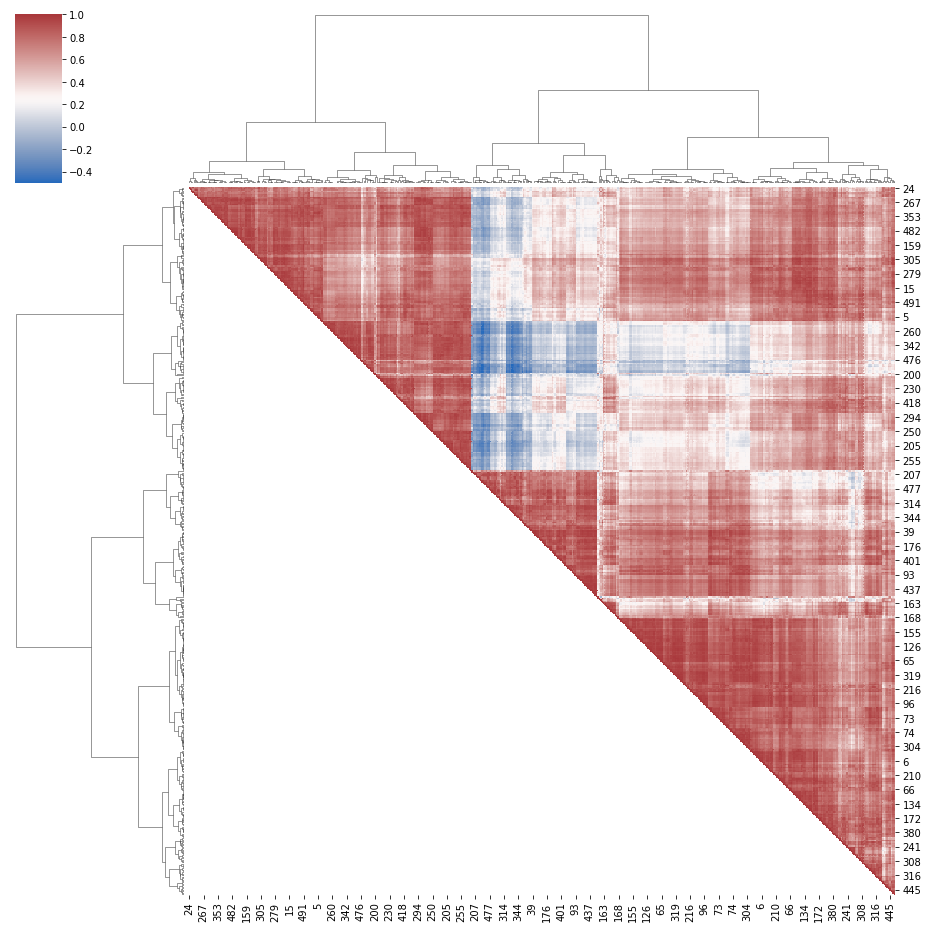

In [20]:
result_dir = "../results/"

def plot_correlationmatrix_dendogram(corr, img_name, ticks, method= 'ward', div=False):

    df = pd.DataFrame(corr)
    
    # group the videos
    links = linkage(df, method=method,)
    order = leaves_list(links)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    
    for i in range(nbVideos):
        for j in range(nbVideos):
            if i>j:
                mask[order[i]][order[j]] = True
    
    sns.clustermap(df, cmap="vlag", mask=mask, method=method,
                   linewidths=0, figsize=(13, 13), cbar_kws={"ticks":ticks}, vmin =-0.5)
    plt.savefig(result_dir+img_name)
    plt.show()
    
    return cut_tree(links, n_clusters = 3)

groups = plot_correlationmatrix_dendogram(corrSpearman, 
                                 "corrmatrix-ugc-dendo-Spearman-" + predDimension + ".pdf",
                                 [k/5 for k in np.arange(-10,10,1)], method='ward')

In [7]:
corrDescription = [corrSpearman[i][j] for i in range(nbVideos) for j in range(nbVideos) if i >j]
pd.Series(corrDescription).describe()

count    121771.000000
mean          0.566074
std           0.281733
min          -0.561647
25%           0.396173
50%           0.624668
75%           0.788512
max           0.996081
dtype: float64

In [8]:
def plot_simple_correlationmatrix_dendogram(corr, img_name, ticks, id_names, method='ward'):

    df = pd.DataFrame(corr)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    
    for i in range(shortnbVideos):
        for j in range(shortnbVideos):
            if i>j:
                mask[i][j] = True
    fig = plt.figure(figsize=(10, 8.5))
    ax = fig.add_subplot(1,1,1)
    sns.heatmap(df, cmap="vlag", mask=mask,
               linewidths=.75, cbar_kws={"ticks":ticks})
    plt.yticks(np.arange(0,len(id_names),1)+0.5, id_names)
    plt.xticks(np.arange(0,len(id_names),1)+0.5, id_names)
    plt.savefig(result_dir+img_name)
    plt.show()

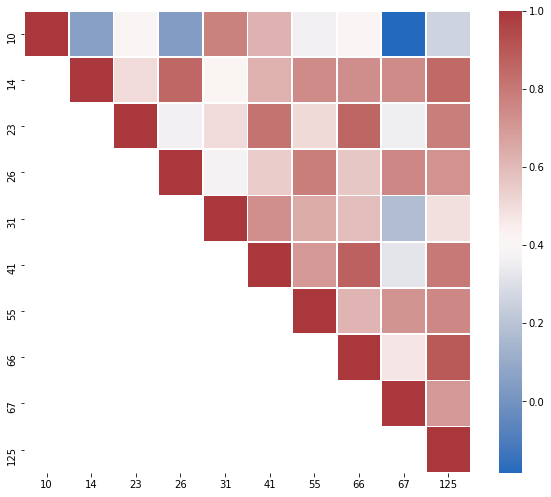

In [9]:
id_short = [10, 14, 23, 26, 31, 41, 55, 66, 67, 125]
short_v_names = [v_names[k] for k in id_short]

shortlistVideo = []
for v in short_v_names:
    data = pd.read_table(res_dir+v, delimiter = ',')
    data['etime'] = [*map(elapsedtime_to_sec, data['elapsedtime'])]
    shortlistVideo.append(data)
    
shortnbVideos = len(shortlistVideo)

shortcorrSpearman= [[0 for x in range(shortnbVideos)] for y in range(shortnbVideos)]


for i in range(shortnbVideos):
    for j in range(shortnbVideos):
        if (i == j):
            shortcorrSpearman[i][j] = 1
        else:
            shortcorrSpearman[i][j] = sc.spearmanr(listVideo[id_short[i]][predDimension],listVideo[id_short[j]][predDimension]).correlation

plot_simple_correlationmatrix_dendogram(shortcorrSpearman, 
                     "corrmatrix-ugc-dendo-Spearman-short-" + predDimension + ".png", 
                     [k/5 for k in np.arange(-10,10,1)],
                                      id_short)

# RQ1-2

### Shortlist

In [10]:
id_short

[10, 14, 23, 26, 31, 41, 55, 66, 67, 125]

In [11]:
shortlistVideo[0] # video 10

,configurationID,cabac,ref,deblock,analyse,me,subme,mixed_ref,me_range,trellis,...,aq-mode,size,usertime,systemtime,elapsedtime,cpu,frames,fps,kbs,etime
0,1,0,1,0:0:0,0:0,dia,0,0,16,0,...,0,12539810,4.75,0.83,0:01.13,493,480,618.64,5010.91,1.13
1,101,1,2,1:0:0,0x3:0x113,hex,6,1,16,1,...,1,9483826,20.33,0.85,0:02.93,723,480,185.02,3789.74,2.93
2,102,1,2,1:0:0,0x3:0x113,hex,6,1,16,1,...,0,4052577,15.89,1.09,0:02.48,684,480,223.37,1619.41,2.48
3,103,1,2,0:0:0,0x3:0x3,umh,6,1,16,1,...,0,4238256,18.89,1.00,0:02.36,840,480,235.82,1693.61,2.36
4,104,1,16,1:0:0,0x3:0x113,hex,6,1,24,1,...,1,17839928,48.24,1.27,0:04.33,1142,480,120.50,7128.84,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,97,1,2,1:0:0,0x3:0x113,hex,4,1,16,0,...,1,8293799,18.00,1.15,0:02.69,711,480,204.04,3314.21,2.69
197,98,1,2,0:0:0,0x3:0x113,hex,4,0,24,0,...,1,8785145,14.04,1.05,0:02.07,728,480,277.18,3510.55,2.07
198,99,1,5,1:0:0,0x3:0x113,hex,6,1,16,1,...,1,10640644,25.47,1.01,0:02.96,894,480,179.29,4252.01,2.96
199,100,0,3,0:0:0,0x113:0x113,hex,6,1,16,1,...,1,20449775,26.24,0.97,0:02.69,1008,480,204.45,8171.74,2.69


In [12]:
listFeatures = ["cabac", "ref", "deblock", "analyse", "me", "subme", "mixed_ref", "me_range", "trellis", "8x8dct", "fast_pskip", "chroma_qp_offset", "bframes", "b_pyramid", "b_adapt", "direct", "weightb", "open_gop", "weightp", "scenecut", "rc_lookahead", "mbtree", "qpmax", "aq-mode"]

to_keep = [k for k in listFeatures]
to_keep.append(predDimension)

categorial = ['analyse', 'me', 'direct']

def compute_Importances(listVid, id_short=None):
    
    if not id_short:
        id_short = np.arange(0,len(listVid),1)
        
    listImportances = []

    for id_video in range(len(listVid)):

        df = listVid[id_video][to_keep].replace(to_replace ="None",value='0')

        df['deblock'] =[int(val[0]) for val in df['deblock']]

        for col in df.columns:
            if col not in categorial:
                arr_col = np.array(df[col],int)
                arr_col = (arr_col-np.mean(arr_col))/(np.std(arr_col)+1e-5)
                df[col] = arr_col
            else:
                df[col] = [np.where(k==df[col].unique())[0][0] for k in df[col]]
                arr_col = np.array(df[col],int)
                arr_col = (arr_col-np.mean(arr_col))/(np.std(arr_col)+1e-5)
                df[col] = arr_col

        clf = RandomForestRegressor(n_estimators=200)
        X = df.drop([predDimension],axis=1)
        y = df[predDimension]
        clf.fit(X,y)

        listImportances.append(clf.feature_importances_)

    res = pd.DataFrame({'features' : listFeatures})

    cs = 100

    for id_video in range(len(listImportances)):
        res['video_'+str(id_short[id_video])] = np.round(cs*listImportances[id_video])/cs

    res = res.set_index('features').transpose().drop(['open_gop','qpmax'],axis=1)
    return res

res = compute_Importances(shortlistVideo, id_short)
res.to_csv("../results/shortlist_features_importances"+predDimension+".csv")

### Boxplot

In [13]:
res = compute_Importances(listVideo)

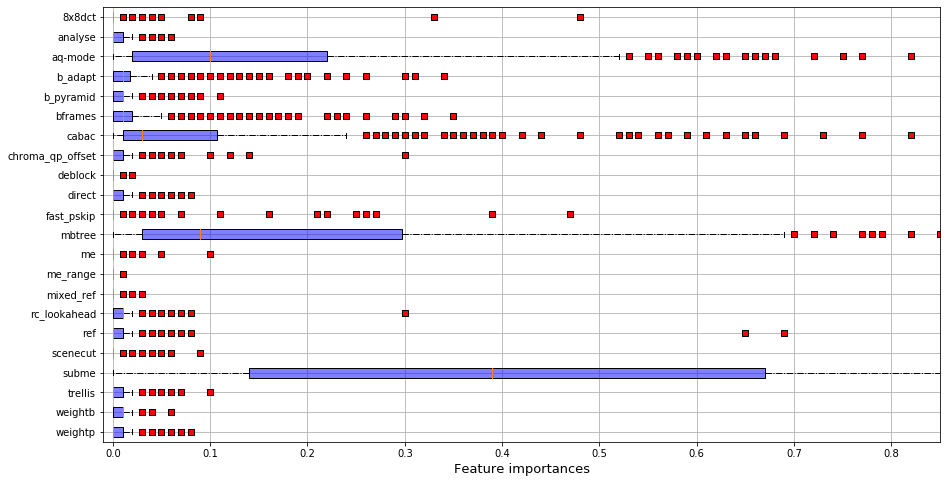

In [14]:
def boxplot_imp(res, xlim = None, criteria = 'max', name = None):
    if criteria == 'max':
        listImp = [(np.percentile(res[col],75), res[col], col) 
                   for col in res.columns]
        listImp.sort(key=lambda tup: tup[0])
    elif criteria == 'range':
        listImp = [(np.abs(np.percentile(res[col],75)-np.percentile(res[col],25)),res[col], col) 
                   for col in res.columns]
        listImp.sort(key=lambda tup: tup[0])
    elif criteria == 'name':
        listImp = [(np.abs(np.percentile(res[col],75)-np.percentile(res[col],25)),res[col], col) 
                   for col in res.columns]
        listImp.sort(key=lambda tup: tup[2], reverse=True)

    red_square = dict(markerfacecolor='r', marker='s')
    plt.figure(figsize=(15,8))
    plt.grid()
    plt.boxplot([l[1] for l in listImp], flierprops=red_square, 
              vert=False, patch_artist=True, #widths=0.25,
              boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
              whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))
    plt.xlabel('Feature importances',size=13)
    if xlim:
        plt.xlim(xlim)
    plt.yticks(range(1, len(listImp) + 1), [l[2] for l in listImp])
    if name:
        plt.savefig(name)
    plt.show()
    
boxplot_imp(res, xlim = (-0.01,0.85),
            criteria = 'name', 
            name = "../group_paper/boxplot_features_imp_rf_"+predDimension+".png")

### Regression

In [15]:
def compute_poly(listVid, id_short=None):
    
    if not id_short:
        id_short = np.arange(0,len(listVid),1)
    
    listImportances = []
    
    #listFeatures = ['subme','aq-mode','mbtree','cabac']
    
    to_keep = [k for k in listFeatures]
    to_keep.append(predDimension)
    
    names = listFeatures
    final_names = []
    final_names.append('constant')
    for n in names:
        final_names.append(n)
    for n1 in range(len(names)):
        for n2 in range(len(names)):
            if n1>=n2:
                final_names.append(str(names[n1])+'*'+str(names[n2]))
    
    for id_video in range(len(listVid)):

        df = listVid[id_video][to_keep].replace(to_replace ="None",value='0')
        df['deblock'] =[int(val[0]) for val in df['deblock']]

        for col in df.columns:
            if col not in categorial:
                arr_col = np.array(df[col],int)
                arr_col = (arr_col-np.mean(arr_col))/(np.std(arr_col)+1e-5)
                df[col] = arr_col
            else:
                df[col] = [np.where(k==df[col].unique())[0][0] for k in df[col]]
                arr_col = np.array(df[col],int)
                arr_col = (arr_col-np.mean(arr_col))/(np.std(arr_col)+1e-5)
                df[col] = arr_col

        clf = LinearRegression()
        X = df.drop([predDimension],axis=1)

        y = df[predDimension]
        #poly = PolynomialFeatures(degree=1, interaction_only = False, include_bias = True)    
        #X_interact = pd.DataFrame(poly.fit_transform(X))#, columns=final_names)
        #kept_names = ['subme','aq-mode','mbtree','cabac','cabac*mbtree','aq-mode*subme','cabac*subme']
        clf.fit(X,y)
        listImportances.append(clf.coef_)

    res = pd.DataFrame({'features' : listFeatures})

    cs = 100

    for id_video in range(len(listImportances)):
        res['video_'+str(id_short[id_video])] = np.round(cs*listImportances[id_video])/cs

    res = res.set_index('features').drop(['open_gop','qpmax']).transpose()
    return res

res = compute_poly(listVideo)
res.to_csv("../results/list_features_importances_poly_"+predDimension+".csv")
res

features,cabac,ref,deblock,analyse,me,subme,mixed_ref,me_range,trellis,8x8dct,...,bframes,b_pyramid,b_adapt,direct,weightb,weightp,scenecut,rc_lookahead,mbtree,aq-mode
video_0,-0.17,0.06,-0.09,-0.05,-0.10,-0.42,0.00,-0.03,0.12,-0.02,...,-0.09,-0.06,0.19,-0.02,-0.30,-0.00,0.03,0.03,0.40,-0.51
video_1,-0.33,0.02,-0.05,-0.02,-0.13,-0.30,0.02,-0.06,0.04,-0.07,...,0.00,-0.06,0.10,0.01,-0.12,0.00,0.00,0.03,-0.41,-0.18
video_2,-0.14,0.02,-0.03,-0.03,-0.05,-0.22,-0.02,-0.05,-0.02,-0.11,...,-0.03,-0.11,0.18,0.02,-0.32,0.02,-0.03,0.05,-0.29,-0.33
video_3,-0.31,0.05,-0.04,0.00,-0.11,-0.22,0.04,-0.03,0.12,-0.11,...,-0.04,-0.05,-0.01,-0.02,-0.13,-0.04,0.02,-0.00,0.61,-0.61
video_4,-0.37,-0.04,-0.02,-0.01,-0.08,-0.08,0.02,-0.03,0.01,-0.05,...,-0.01,0.01,0.03,0.02,-0.00,-0.02,0.00,0.02,-0.74,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
video_489,-0.16,0.05,-0.09,-0.05,-0.06,-0.33,-0.01,-0.06,0.05,-0.20,...,-0.04,-0.06,0.19,-0.02,-0.36,0.06,-0.04,0.11,-0.13,-0.29
video_490,-0.06,0.11,-0.13,-0.08,-0.05,-0.37,-0.02,-0.06,0.11,-0.21,...,-0.08,-0.05,0.08,-0.00,-0.33,0.03,0.00,0.06,0.42,-0.47
video_491,-0.14,0.07,-0.12,-0.06,-0.06,-0.41,-0.01,-0.06,0.10,-0.21,...,-0.07,-0.08,0.16,0.00,-0.31,0.02,0.00,0.05,0.09,-0.35
video_492,-0.44,0.01,-0.07,-0.05,-0.10,-0.12,-0.00,-0.02,0.10,-0.04,...,-0.07,0.12,-0.06,0.02,0.03,0.03,0.17,0.05,-0.79,0.46


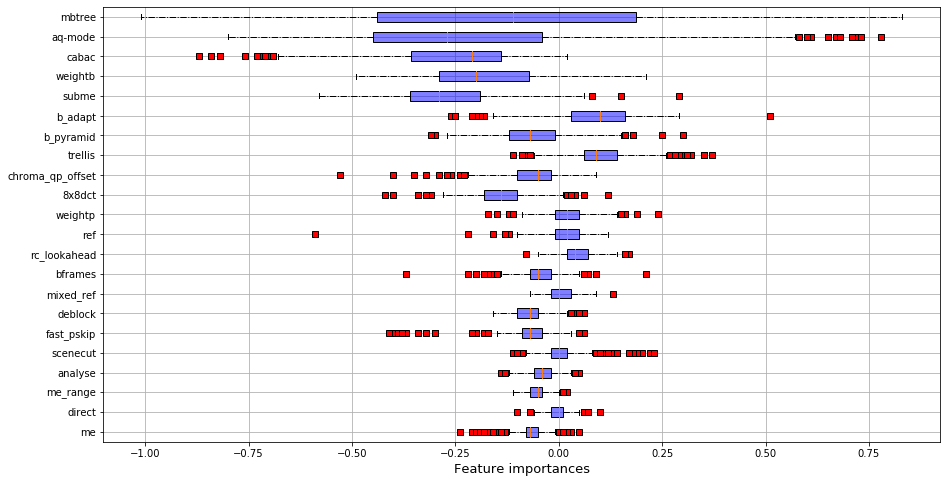

In [16]:
boxplot_imp(res, criteria ='range', name ="../group_paper/boxplot_features_imp_linear_"+predDimension+".png")

# RQ2

## RQ2.1 - Group of performances

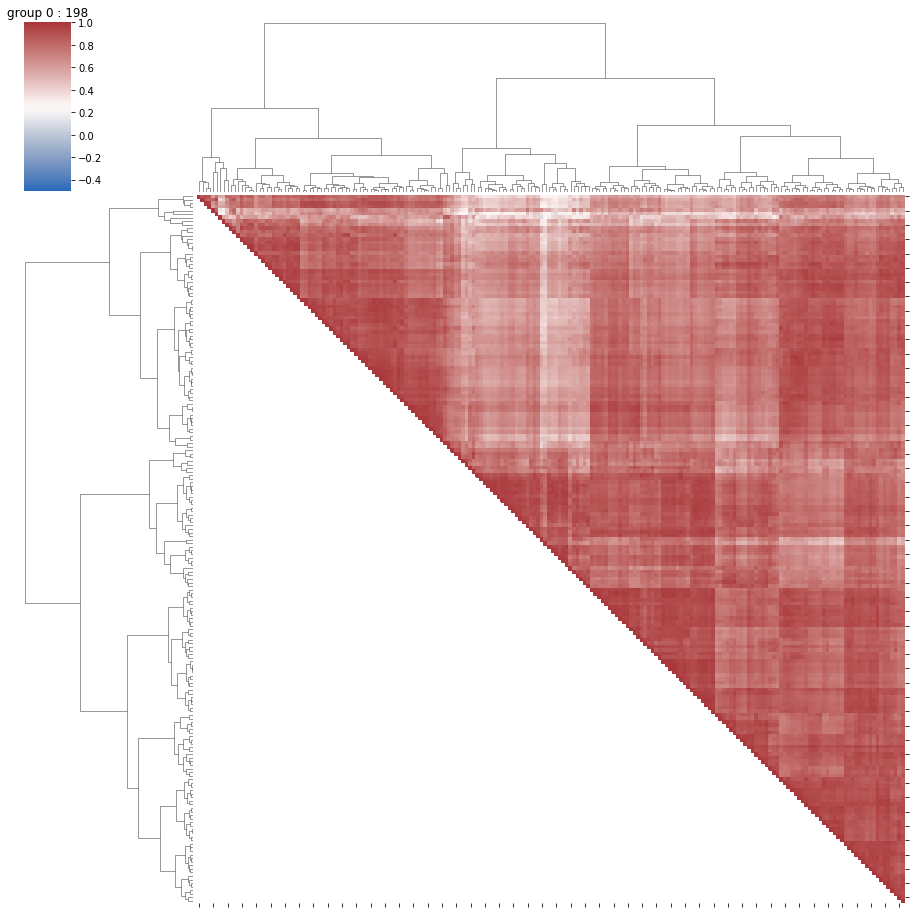

count    19503.000000
mean         0.780177
std          0.125550
min          0.096453
25%          0.707623
50%          0.803675
75%          0.876886
max          0.996081
dtype: float64


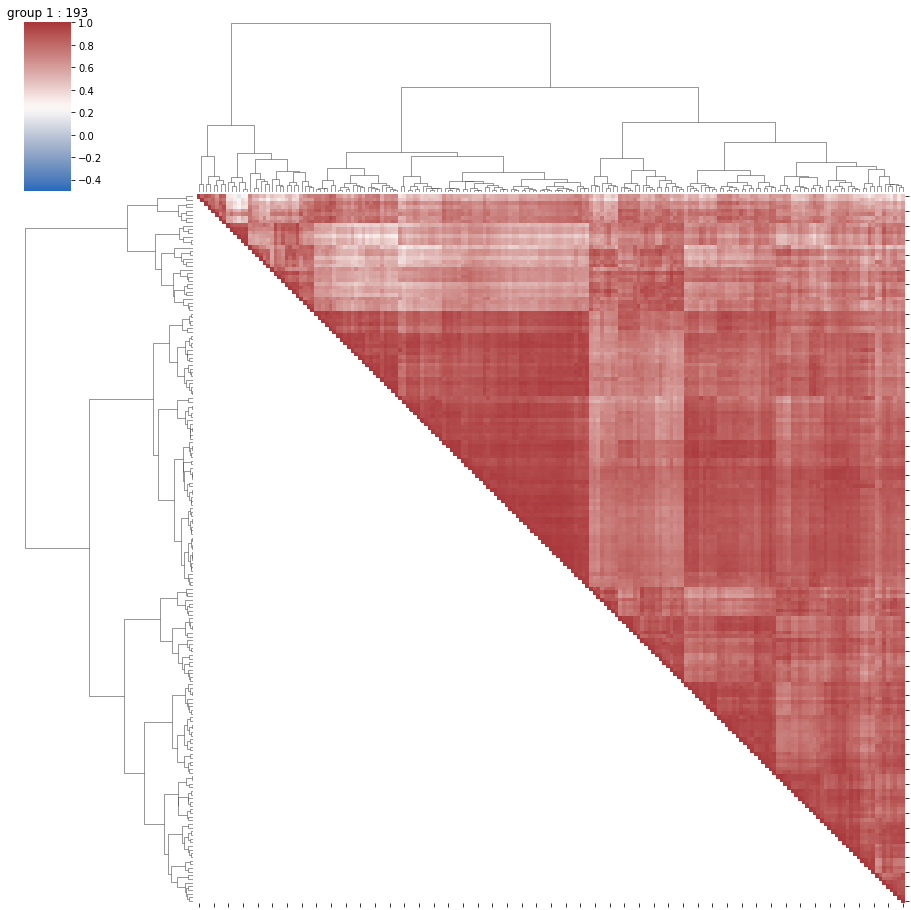

count    18528.000000
mean         0.790452
std          0.125377
min          0.144203
25%          0.714481
50%          0.812903
75%          0.888392
max          0.995213
dtype: float64


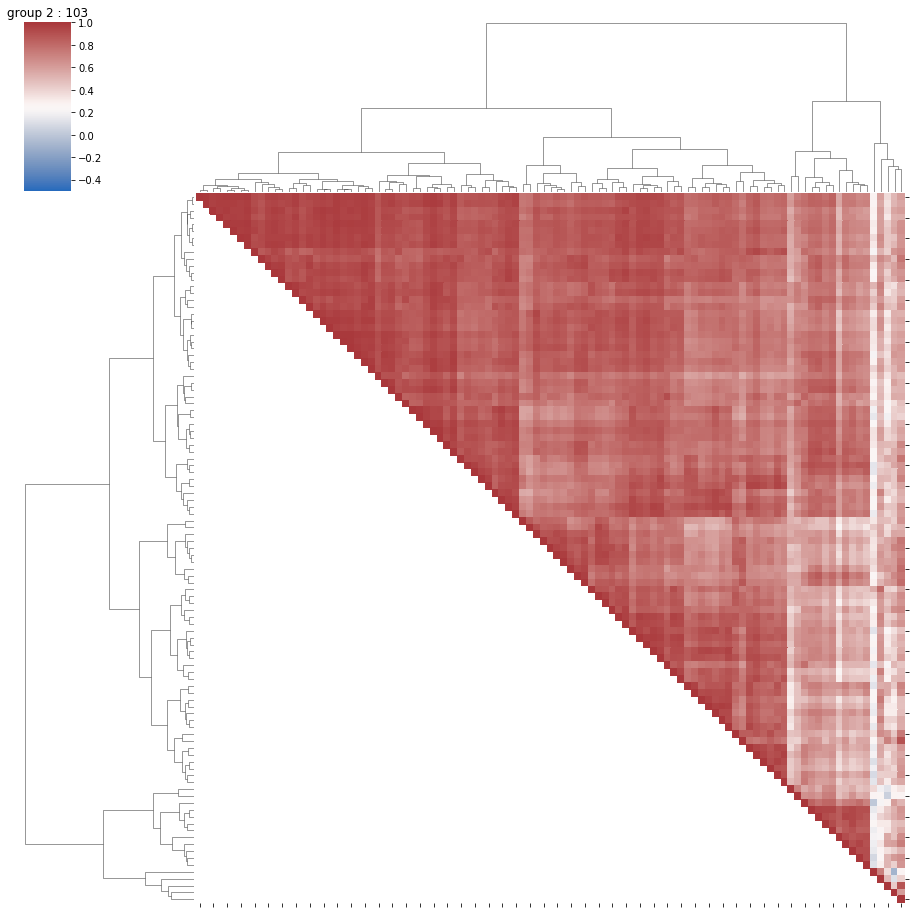

count    5253.000000
mean        0.762369
std         0.161963
min        -0.092863
25%         0.686811
50%         0.803697
75%         0.879945
max         0.992130
dtype: float64


In [21]:
def plot_corr_matrix(corr, method = 'ward', title=''):

    df = pd.DataFrame(corr)
    
    links = linkage(df, method=method,)
    order = leaves_list(links)
    
    mask = np.zeros_like(corr, dtype=np.bool)
    
    for i in range(len(corr)):
        for j in range(len(corr)):
            if i>j:
                mask[order[i]][order[j]] = True
    
    g = sns.clustermap(df, cmap="vlag", mask=mask, method=method,
                   linewidths=0, figsize=(13, 13), vmin=-0.5)
    g.ax_heatmap.set_yticklabels([])
    g.ax_heatmap.set_xticklabels([])
    plt.title(title)
    plt.show()
    
    corrDescription = [corr[i][j] for i in range(len(corr)) for j in range(len(corr)) if i >j]
    return pd.Series(corrDescription).describe()

def plot_group(group_index):
    ind = np.array([k for k in range(len(corrSpearman)) if groups[k] == group_index], dtype=int)
    group = np.copy([[corrSpearman[k][j] for j in ind] for k in ind])
    print(plot_corr_matrix(group,title="group "+str(group_index)+" : "+str(len(group))))

for i in range(3):
    plot_group(i)

## Summary per group

In [23]:
meta = pd.read_csv("../ugc_meta/all_features.csv").set_index('FILENAME')
meta['category']=[str(meta.index[i]).split('_')[0] for i in range(meta.shape[0])]
del meta['NOISE_DMOS']
meta = meta.fillna(0)
cat_tab = pd.Series(meta['category'].values).unique()
meta['video_category'] = [np.where(cat_tab==meta['category'][i])[0][0] for i in range(len(meta['category']))]
del meta['category']
for col in meta.columns:#[:len(meta.columns)-1]:
    inter = np.array(meta[col],float)
    meta[col] = (inter-np.mean(inter))/np.std(inter)
perf = pd.DataFrame({'FILENAME': np.array([v_names[k][:-4] for k in range(len(v_names))])[1:],
              'perf_group' : np.array([k[0] for k in groups])[1:]}).set_index('FILENAME')
meta_perf = perf.join(meta)
meta_perf

,perf_group,SLEEQ_DMOS,BANDING_DMOS,WIDTH,HEIGHT,SPATIAL_COMPLEXITY,TEMPORAL_COMPLEXITY,CHUNK_COMPLEXITY_VARIATION,COLOR_COMPLEXITY,video_category
FILENAME,,,,,,,,,,
Animation_1080P-58d3,1,-0.679597,6.009941,0.380890,0.330315,-1.310072,1.005031,0.542008,-1.011561,-1.618994
Animation_1080P-7f27,1,-0.679597,-0.377309,0.380890,0.330315,-1.522703,0.075876,-0.838973,-1.024562,-1.618994
Animation_2160P-41dc,0,-0.618052,-0.259463,2.246698,2.324616,1.255599,0.097998,2.589216,1.610395,-1.618994
Animation_2160P-6f3b,1,1.589873,3.358407,1.461504,2.590523,-1.428722,1.642167,-0.418403,-0.101460,-1.618994
Animation_360P-3e40,0,-0.564201,2.627762,-0.862982,-0.999219,-0.382013,-0.494891,-0.028458,-1.150243,-1.618994
...,...,...,...,...,...,...,...,...,...,...
Vlog_720P-561e,1,-0.679597,-0.377309,-0.241046,-0.334452,0.979531,-1.415198,-0.652628,0.457602,1.494285
Vlog_720P-5d08,0,-0.679597,-0.377309,-0.773579,-0.334452,3.258561,-0.304636,-0.437382,-0.157800,1.494285
Vlog_720P-60f8,0,0.443598,0.624381,-0.241046,-0.334452,0.234735,-0.043587,-0.364052,-0.149132,1.494285


In [24]:
meta_perf['str_video_cat'] = [str(meta_perf.index[i]).split('_')[0] for i in range(meta_perf.shape[0])]
total_cat = meta_perf.groupby('str_video_cat').count()['perf_group']
group_perf = np.array([gr[0] for gr in groups])
group_perf

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1,

In [25]:
def summary_group(id_group):
            
    id_list = [i for i in range(len(listVideo)) if group_perf[i]==id_group]
    v_names_group = [v_names[i][:-4] for i in range(len(v_names)) if i in id_list]
    listVideoGroup = [listVideo[i] for i in range(len(listVideo)) if i in id_list]
    
    print('Group '+str(id_group)+' : '+str(len(listVideoGroup))+' videos!')
    
    print('\n')

    # features importances
    boxplot_imp(compute_Importances(listVideoGroup), criteria = 'name', xlim= (0, 1),
               name ="../results/boxplot_imp_group"+str(id_group)+".png")

    # features effects
    boxplot_imp(compute_poly(listVideoGroup), criteria = 'name', xlim = (-1, 1),
               name ="../results/boxplot_effect_group"+str(id_group)+".png")

    print('\n')

    interest_var = ['cpu', 'etime', 'fps', 'kbs', 'size']

    for iv in interest_var:
        pred = [np.mean(lv[iv]) for lv in listVideoGroup]
        print('Mean '+iv+' in the group: '+str(np.round(np.mean(pred),1)))

    print('\n')

    # percentage of the videos present in the group par category

    meta_perf_group = meta_perf.query('perf_group=='+str(id_group))
    meta_perf_group['str_video_cat'] = [str(meta_perf_group.index[i]).split('_')[0] for i in range(meta_perf_group.shape[0])]
    val_group = meta_perf_group.groupby('str_video_cat').count()['perf_group']
    df_res_cat_group = pd.DataFrame({'val': val_group, 'total': total_cat})
    print(df_res_cat_group['val']/df_res_cat_group['total'])

    print('\n')

    # Mean of the videos of the group per properties

    for col in meta_perf_group.columns:
        if col not in ['str_video_cat', 'video_category']:
            print('Mean '+col+' : '+str(meta_perf_group[col].mean()))

    print('\n')

    corrGroup = np.array([corrSpearman[i][j] for i in range(len(corrSpearman)) if i in id_list 
                 for j in range(len(corrSpearman)) if j in id_list],float)

    print("Correlations intra-group: \n" + str(pd.Series(corrGroup).describe().iloc[[1,5]])+'\n')

Group 0 : 198 videos!




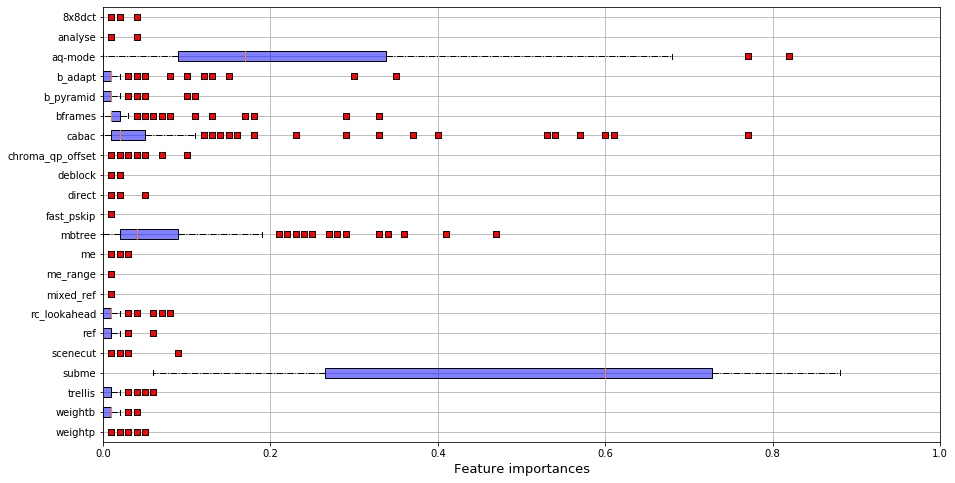

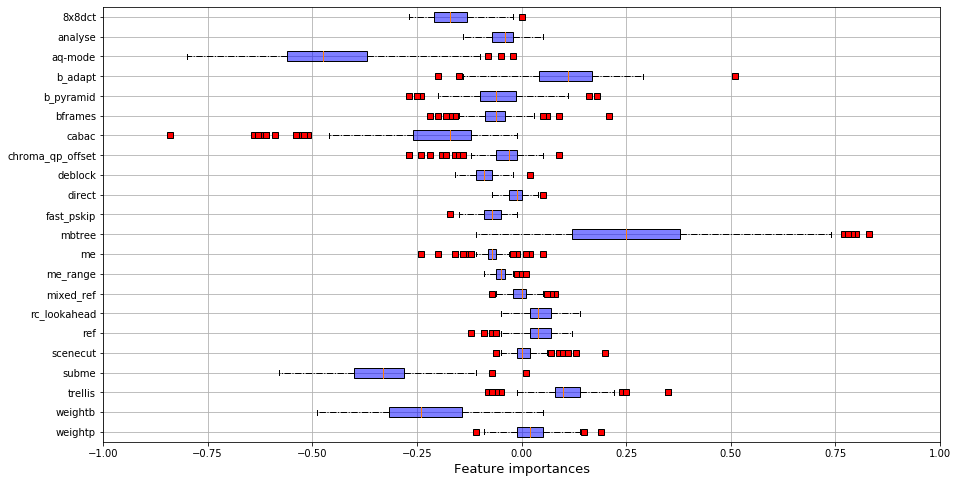



Mean cpu in the group: 1039.9
Mean etime in the group: 9.3
Mean fps in the group: 419.7
Mean kbs in the group: 14572.7
Mean size in the group: 36402637.0


str_video_cat
Animation         0.200000
CoverSong         0.625000
Gaming            0.600000
HDR               0.060606
HowTo             0.302326
Lecture           0.250000
LiveMusic         0.432432
LyricVideo        0.272727
MusicVideo        0.625000
NewsClip          0.750000
Sports            0.700000
TelevisionClip    0.333333
VR                0.166667
VerticalVideo     0.444444
Vlog              0.493671
dtype: float64


Mean perf_group : 0.0
Mean SLEEQ_DMOS : -0.06371828075624303
Mean BANDING_DMOS : -0.23176660385141928
Mean WIDTH : -0.08165523457276429
Mean HEIGHT : -0.09441598651195977
Mean SPATIAL_COMPLEXITY : 0.7123006149536146
Mean TEMPORAL_COMPLEXITY : 0.20695020033984712
Mean CHUNK_COMPLEXITY_VARIATION : 0.5573877546208215
Mean COLOR_COMPLEXITY : -0.06304984408060346


Correlations intra-group: 
mean    0.781287

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
summary_group(0)

Group 1 : 193 videos!




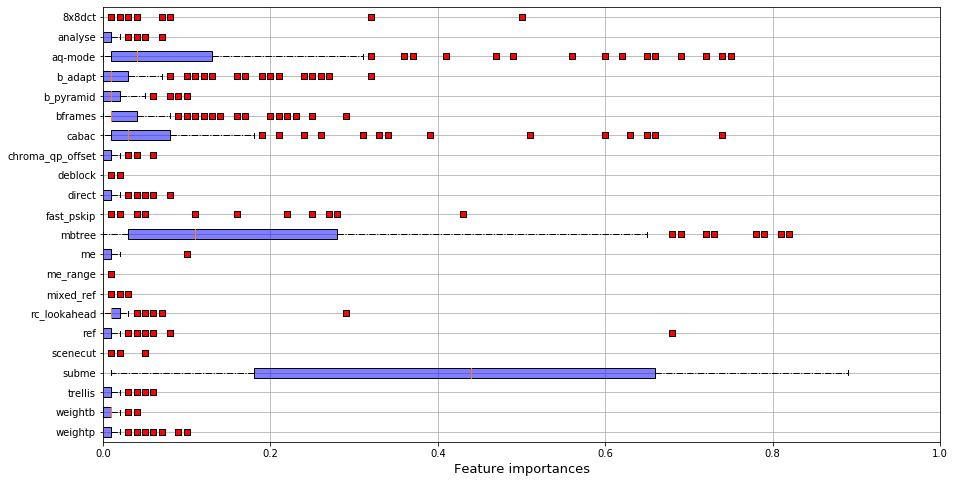

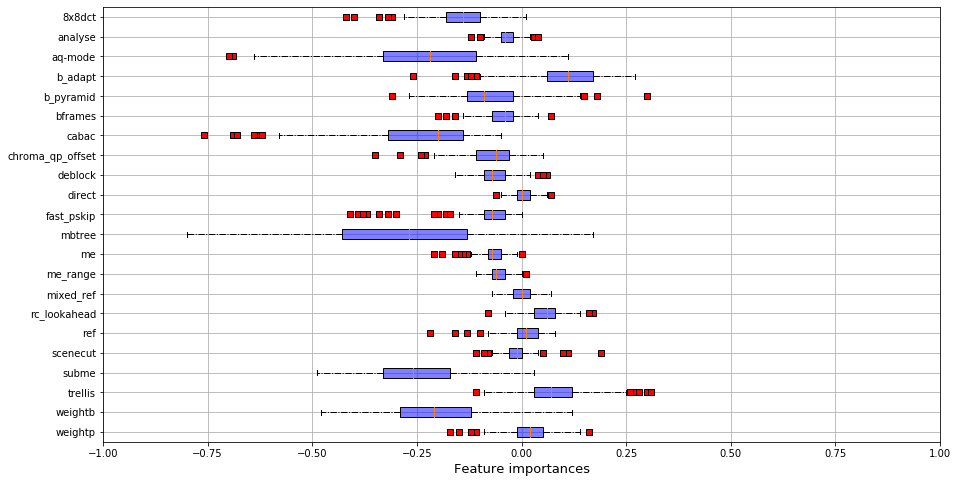



Mean cpu in the group: 802.0
Mean etime in the group: 8.7
Mean fps in the group: 534.3
Mean kbs in the group: 5656.9
Mean size in the group: 14083523.3


str_video_cat
Animation         0.700000
CoverSong         0.125000
Gaming            0.400000
HDR               0.424242
HowTo             0.546512
Lecture           0.750000
LiveMusic         0.405405
LyricVideo        0.545455
MusicVideo        0.375000
NewsClip          0.250000
Sports            0.300000
TelevisionClip    0.555556
VR                0.500000
VerticalVideo     0.111111
Vlog              0.227848
dtype: float64


Mean perf_group : 1.0
Mean SLEEQ_DMOS : -0.015677209889861543
Mean BANDING_DMOS : 0.05652249972229414
Mean WIDTH : -0.15523781945075554
Mean HEIGHT : -0.1710731638562168
Mean SPATIAL_COMPLEXITY : -0.354482350643009
Mean TEMPORAL_COMPLEXITY : -0.3822602507904533
Mean CHUNK_COMPLEXITY_VARIATION : -0.210178049258323
Mean COLOR_COMPLEXITY : 0.1677975294561492


Correlations intra-group: 
mean    0.791537
50% 

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
summary_group(1)

Group 2 : 103 videos!




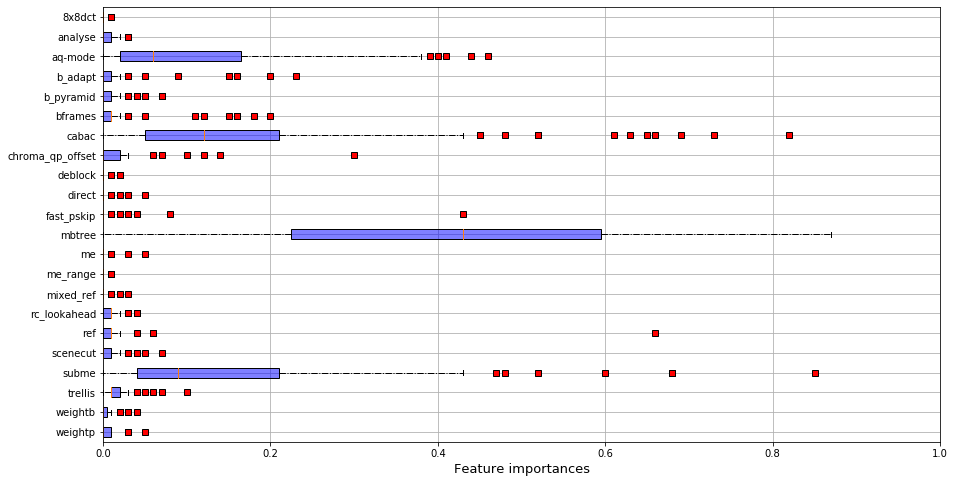

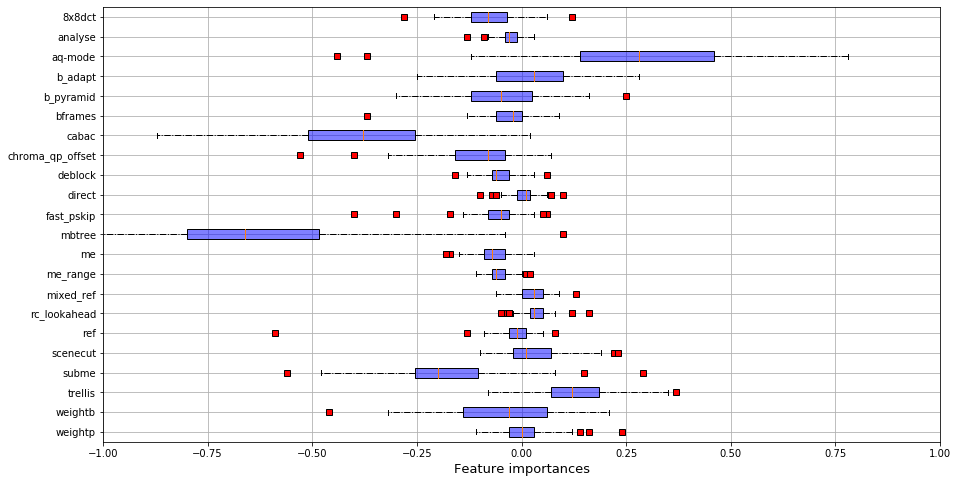



Mean cpu in the group: 1051.1
Mean etime in the group: 18.0
Mean fps in the group: 216.3
Mean kbs in the group: 12795.1
Mean size in the group: 31570946.9


Animation         0.100000
CoverSong         0.250000
Gaming                 NaN
HDR               0.515152
HowTo             0.151163
Lecture                NaN
LiveMusic         0.162162
LyricVideo        0.181818
MusicVideo             NaN
NewsClip               NaN
Sports                 NaN
TelevisionClip    0.111111
VR                0.333333
VerticalVideo     0.444444
Vlog              0.278481
dtype: float64


Mean perf_group : 2.0
Mean SLEEQ_DMOS : 0.03982129668417486
Mean BANDING_DMOS : 0.03389292427470806
Mean WIDTH : 0.6696296521079289
Mean HEIGHT : 0.5997357441693293
Mean SPATIAL_COMPLEXITY : -0.9320278124229471
Mean TEMPORAL_COMPLEXITY : 0.7931684709387054
Mean CHUNK_COMPLEXITY_VARIATION : -0.29095208150981583
Mean COLOR_COMPLEXITY : 0.2529025704040019


Correlations intra-group: 
mean    0.764676
50%     0.805125
d

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
summary_group(2)

In [29]:
group_perf
id_list_0 = [i for i in range(len(listVideo)) if group_perf[i]==0]
id_list_1 = [i for i in range(len(listVideo)) if group_perf[i]==1]
id_list_2 = [i for i in range(len(listVideo)) if group_perf[i]==2]

res = np.zeros(9).reshape(3,3)

tab = []
for id0 in id_list_0:
    for id1 in id_list_1:
        tab.append(corrSpearman[id0][id1])
res[0][1] = np.mean(tab)

for id0 in id_list_0:
    for id2 in id_list_2:
        tab.append(corrSpearman[id0][id2])
res[0][2] = np.mean(tab)

for id1 in id_list_1:
    for id2 in id_list_2:
        tab.append(corrSpearman[id1][id2])
res[1][2] = np.mean(tab)

print(res)

res_med = np.zeros(9).reshape(3,3)

tab = []
for id0 in id_list_0:
    for id1 in id_list_1:
        tab.append(corrSpearman[id0][id1])
res_med[0][1] = np.median(tab)

for id0 in id_list_0:
    for id2 in id_list_2:
        tab.append(corrSpearman[id0][id2])
res_med[0][2] = np.median(tab)

for id1 in id_list_1:
    for id2 in id_list_2:
        tab.append(corrSpearman[id1][id2])
res_med[1][2] = np.median(tab)

res_med

[[0.         0.52197841 0.39764268]
 [0.         0.         0.44676754]
 [0.         0.         0.        ]]


array([[0.        , 0.54381575, 0.42639988],
       [0.        , 0.        , 0.48449082],
       [0.        , 0.        , 0.        ]])

## RQ2.2 - Group classification

In [36]:
if 'str_video_cat' in meta_perf.columns:
    del meta_perf['str_video_cat']
X = np.array(meta_perf[[k for k in meta_perf.columns if k !='perf_group']], float)
y = np.array(meta_perf['perf_group'], float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

conf = pd.crosstab(y_test, y_pred)
print('Test accuracy : '+ str(np.sum(np.diag(conf))/len(y_test)))
conf

Test accuracy : 0.7432432432432432


col_0,0.0,1.0,2.0
row_0,,,
0.0,24,4,1
1.0,6,23,1
2.0,1,6,8


In [37]:
pd.DataFrame({'Random forest importance' : rf.feature_importances_,
              'name' : meta_perf.columns[1:]}).set_index('name')

,Random forest importance
name,
SLEEQ_DMOS,0.070163
BANDING_DMOS,0.046932
WIDTH,0.033662
HEIGHT,0.030818
SPATIAL_COMPLEXITY,0.335841
TEMPORAL_COMPLEXITY,0.205865
CHUNK_COMPLEXITY_VARIATION,0.125199
COLOR_COMPLEXITY,0.096271
video_category,0.055249


In [38]:
meta_perf.groupby(['perf_group']).mean()

,SLEEQ_DMOS,BANDING_DMOS,WIDTH,HEIGHT,SPATIAL_COMPLEXITY,TEMPORAL_COMPLEXITY,CHUNK_COMPLEXITY_VARIATION,COLOR_COMPLEXITY,video_category
perf_group,,,,,,,,,
0,-0.063718,-0.231767,-0.081655,-0.094416,0.712301,0.206950,0.557388,-0.063050,0.489637
1,-0.015677,0.056522,-0.155238,-0.171073,-0.354482,-0.382260,-0.210178,0.167798,0.047106
2,0.039821,0.033893,0.669630,0.599736,-0.932028,0.793168,-0.290952,0.252903,0.429898


# PCA 

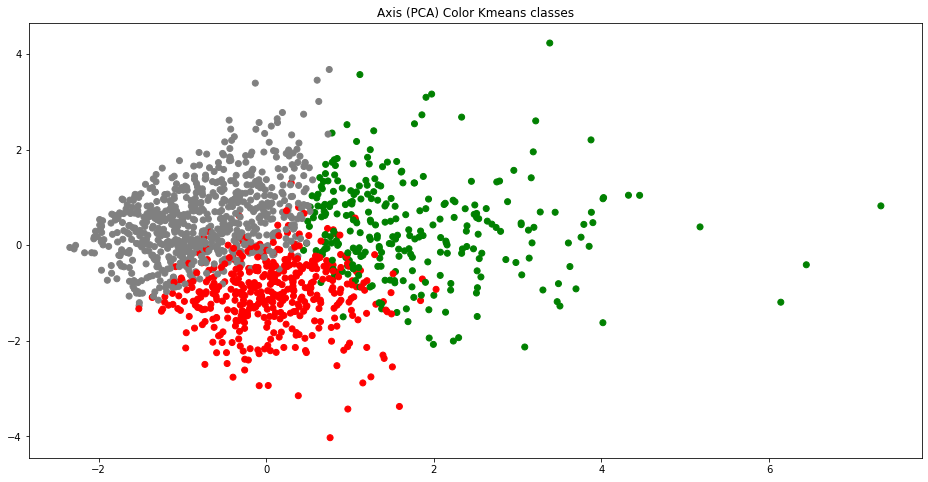

In [60]:

df_std_meta = meta[['SPATIAL_COMPLEXITY', 'TEMPORAL_COMPLEXITY', 
                          'CHUNK_COMPLEXITY_VARIATION','COLOR_COMPLEXITY']]
std_meta = np.array(df_std_meta)

kmeans = KMeans(n_clusters=3)
kmeans.fit(std_meta)
meta['clusters'] = kmeans.labels_
meta['category']=[str(meta.index[i]).split('_')[0] for i in range(meta.shape[0])]
meta['quality']=[str(meta.index[i]).split('_')[1].split('-')[0] for i in range(meta.shape[0])]


pca = PCA(n_components=2, svd_solver='full')
tab = pca.fit_transform(std_meta)
x = [tab[i][0] for i in range(len(tab))]
y = [tab[i][1] for i in range(len(tab))]

col = ['gray','red','green','black']

plt.figure(figsize=(16,8))
plt.title("Axis (PCA) Color Kmeans classes")
plt.scatter(x, y, color = [col[k] for k in meta['clusters']])
lab=np.array(meta.index,str)
#for i in range(len(x)):
#    plt.text(x[i], y[i], lab[i])
plt.show()

In [62]:
pd.crosstab(meta_perf['perf_group'], meta['clusters'])

clusters,0,1,2
perf_group,,,
0,82,31,84
1,122,55,16
2,20,81,2


In [64]:
meta_perf

,perf_group,SLEEQ_DMOS,BANDING_DMOS,WIDTH,HEIGHT,SPATIAL_COMPLEXITY,TEMPORAL_COMPLEXITY,CHUNK_COMPLEXITY_VARIATION,COLOR_COMPLEXITY,video_category
FILENAME,,,,,,,,,,
Animation_1080P-58d3,1,-0.679597,6.009941,0.380890,0.330315,-1.310072,1.005031,0.542008,-1.011561,-1.618994
Animation_1080P-7f27,1,-0.679597,-0.377309,0.380890,0.330315,-1.522703,0.075876,-0.838973,-1.024562,-1.618994
Animation_2160P-41dc,0,-0.618052,-0.259463,2.246698,2.324616,1.255599,0.097998,2.589216,1.610395,-1.618994
Animation_2160P-6f3b,1,1.589873,3.358407,1.461504,2.590523,-1.428722,1.642167,-0.418403,-0.101460,-1.618994
Animation_360P-3e40,0,-0.564201,2.627762,-0.862982,-0.999219,-0.382013,-0.494891,-0.028458,-1.150243,-1.618994
...,...,...,...,...,...,...,...,...,...,...
Vlog_720P-561e,1,-0.679597,-0.377309,-0.241046,-0.334452,0.979531,-1.415198,-0.652628,0.457602,1.494285
Vlog_720P-5d08,0,-0.679597,-0.377309,-0.773579,-0.334452,3.258561,-0.304636,-0.437382,-0.157800,1.494285
Vlog_720P-60f8,0,0.443598,0.624381,-0.241046,-0.334452,0.234735,-0.043587,-0.364052,-0.149132,1.494285
